✅ Found 12 monthly files. Starting Tesla Seasonal Analysis...
  Processing: yellow_tripdata_2024-01.parquet...
  Processing: yellow_tripdata_2024-02.parquet...
  Processing: yellow_tripdata_2024-03.parquet...
  Processing: yellow_tripdata_2024-04.parquet...
  Processing: yellow_tripdata_2024-05.parquet...
  Processing: yellow_tripdata_2024-06.parquet...
  Processing: yellow_tripdata_2024-07.parquet...
  Processing: yellow_tripdata_2024-08.parquet...
  Processing: yellow_tripdata_2024-09.parquet...
  Processing: yellow_tripdata_2024-10.parquet...
  Processing: yellow_tripdata_2024-11.parquet...
  Processing: yellow_tripdata_2024-12.parquet...

📊 2024 Tesla Fleet Efficiency Report:


,Month,Revenue,Miles,Efficiency ($/Mile)
0,January,7.767136e+07,9564780.00,8.120559
1,February,7.820305e+07,9467431.05,8.260219
2,March,9.480869e+07,11751114.27,8.068059
3,April,9.519685e+07,11785408.31,8.077518
4,May,1.036805e+08,12608910.15,8.222795
5,June,9.714829e+07,11948773.66,8.130399
6,July,8.485238e+07,10898372.83,7.785784
7,August,8.233969e+07,10741467.28,7.665591
8,September,1.012786e+08,12574511.05,8.054278
9,October,1.066054e+08,13101871.03,8.136656


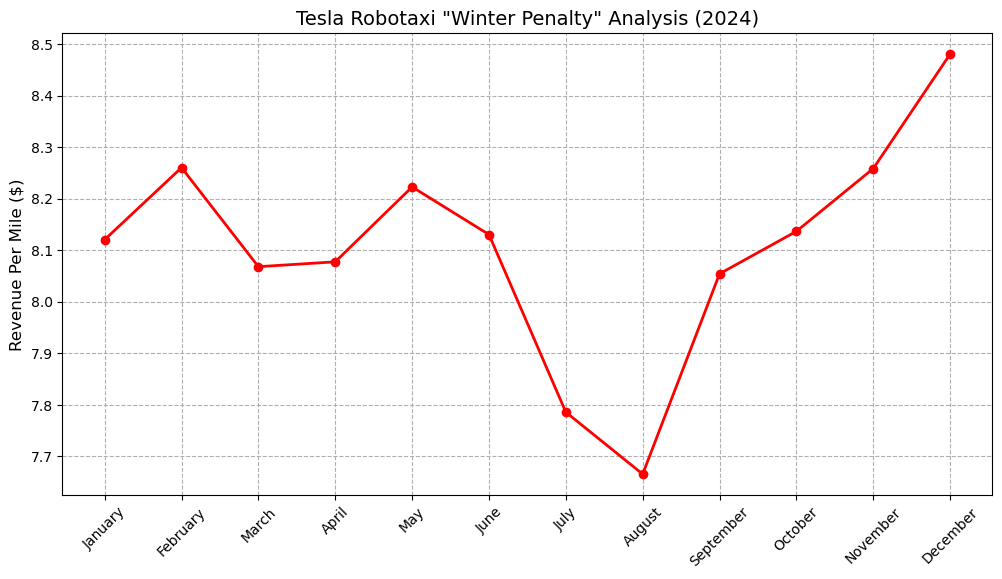

In [1]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt

# 1. SETUP: Point to your specific folder
# Note: We use 'r' before the string to handle the backslashes in Windows paths correctly
folder_path = r"C:\Users\thist\00_Master_Portfolio\Tesla_Robotaxi_Analysis\Data"

# 2. FIND FILES: Look for all .parquet files in that folder
all_files = sorted(glob.glob(os.path.join(folder_path, "*.parquet")))
print(f"✅ Found {len(all_files)} monthly files. Starting Tesla Seasonal Analysis...")

# 3. THE LOOP: Process each month one by one to save RAM
monthly_data = []

for file in all_files:
    # Get the filename (e.g., 'yellow_tripdata_2024-01.parquet')
    file_name = os.path.basename(file)
    print(f"  Processing: {file_name}...")
    
    # Load ONLY the columns we need (Efficiency Metrics)
    df = pd.read_parquet(file, columns=[
        'tpep_pickup_datetime', 
        'trip_distance', 
        'total_amount'
    ])
    
    # FILTER: Tesla Logic (Remove bad data: 0 miles, or huge outliers > 100 miles)
    clean_df = df[(df['trip_distance'] > 0) & (df['trip_distance'] < 100)]
    
    # CALCULATE METRICS for this specific month
    total_revenue = clean_df['total_amount'].sum()
    total_miles = clean_df['trip_distance'].sum()
    
    # Get the Month Name (e.g., 'January') from the first row
    month_name = clean_df['tpep_pickup_datetime'].dt.month_name().mode()[0]
    
    # Save the summary
    monthly_data.append({
        'Month': month_name,
        'Revenue': total_revenue,
        'Miles': total_miles,
        'Efficiency ($/Mile)': total_revenue / total_miles
    })

# 4. VISUALIZE: Create the Seasonality DataFrame
seasonality_df = pd.DataFrame(monthly_data)

# Show the Data Table
print("\n📊 2024 Tesla Fleet Efficiency Report:")
display(seasonality_df)

# Plot the Trend Line
plt.figure(figsize=(12, 6))
plt.plot(seasonality_df['Month'], seasonality_df['Efficiency ($/Mile)'], marker='o', color='red', linewidth=2)
plt.title('Tesla Robotaxi "Winter Penalty" Analysis (2024)', fontsize=14)
plt.ylabel('Revenue Per Mile ($)', fontsize=12)
plt.grid(True, linestyle='--')
plt.xticks(rotation=45)
plt.show()

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. SETUP: Define the two specific months we want to compare
# (Make sure these files exist in your folder)
files_to_compare = {
    'August (Low Efficiency)': 'yellow_tripdata_2024-08.parquet',
    'December (High Efficiency)': 'yellow_tripdata_2024-12.parquet'
}

folder_path = r"C:\Users\thist\00_Master_Portfolio\Tesla_Robotaxi_Analysis\Data"
comparison_data = []

# 2. THE LOOP: Process only these two months
for label, filename in files_to_compare.items():
    path = f"{folder_path}\\{filename}"
    print(f"Analyzing: {label}...")
    
    df = pd.read_parquet(path, columns=['PULocationID', 'total_amount', 'trip_distance'])
    
    # 3. FILTER: Look ONLY at "Midtown East" (Zone 237) - The heart of business wealth
    # (You can also add Zone 161 for Midtown Center)
    midtown_df = df[df['PULocationID'] == 237]
    
    # 4. CALCULATE METRICS
    trip_count = len(midtown_df)
    avg_revenue = midtown_df['total_amount'].mean()
    
    comparison_data.append({
        'Month': label,
        'Midtown_Trip_Volume': trip_count,
        'Avg_Trip_Price': avg_revenue
    })

# 3. VISUALIZE THE "MISSING BANKER"
results_df = pd.DataFrame(comparison_data)
print("\n--- The 'Missing Banker' Effect (Midtown Zone 237) ---")
display(results_df)

# Calculate the drop
drop_pct = (1 - results_df.iloc[0]['Midtown_Trip_Volume'] / results_df.iloc[1]['Midtown_Trip_Volume']) * 100
print(f"\n📉 INSIGHT: Midtown demand drops by {drop_pct:.1f}% in August.")

Analyzing: August (Low Efficiency)...
Analyzing: December (High Efficiency)...

--- The 'Missing Banker' Effect (Midtown Zone 237) ---


,Month,Midtown_Trip_Volume,Avg_Trip_Price
0,August (Low Efficiency),119451,19.761250
1,December (High Efficiency),183297,20.842995



📉 INSIGHT: Midtown demand drops by 34.8% in August.


Processing Hour Data: August (Summer)...
Processing Hour Data: December (Winter)...


C:\Users\thist\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\thist\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


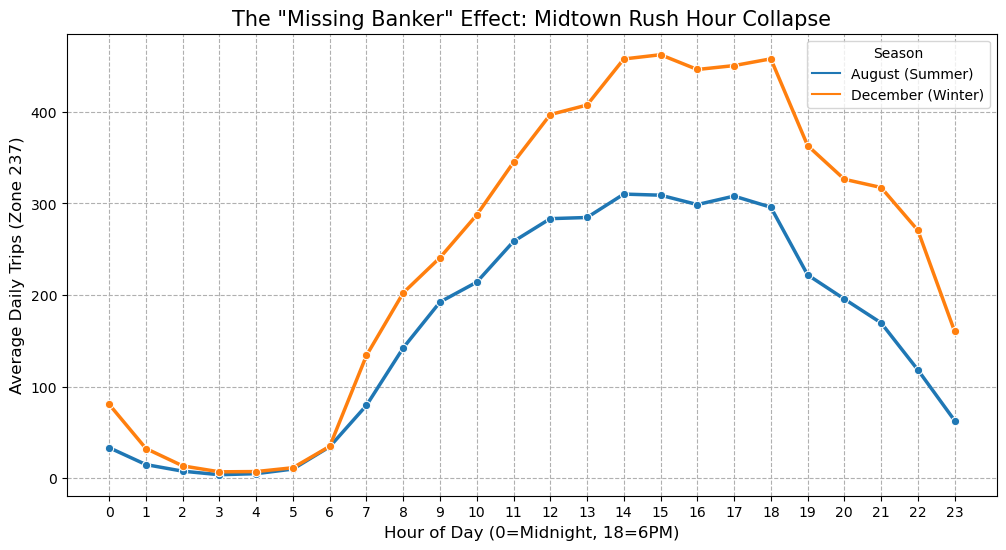

In [2]:
import seaborn as sns

# 1. SETUP: We reuse the same 2 months (Aug vs Dec)
# (Ensure your 'folder_path' is still defined from the previous cell)
files_to_compare = {
    'August (Summer)': 'yellow_tripdata_2024-08.parquet',
    'December (Winter)': 'yellow_tripdata_2024-12.parquet'
}

hourly_data = []

# 2. THE LOOP
for label, filename in files_to_compare.items():
    path = f"{folder_path}\\{filename}"
    print(f"Processing Hour Data: {label}...")
    
    # Load specific columns including the Pickup Time
    df = pd.read_parquet(path, columns=['tpep_pickup_datetime', 'PULocationID'])
    
    # FILTER: Midtown Zone 237 Only (The "Banker" Zone)
    midtown_df = df[df['PULocationID'] == 237].copy()
    
    # Extract the HOUR of the trip (0-23)
    midtown_df['hour'] = midtown_df['tpep_pickup_datetime'].dt.hour
    
    # Count trips per hour
    # We divide by 31 (days) to get a "Daily Average" instead of raw totals
    hourly_counts = midtown_df.groupby('hour').size() / 31
    
    # Save for plotting
    for hour, count in hourly_counts.items():
        hourly_data.append({
            'Season': label,
            'Hour_of_Day': hour,
            'Avg_Daily_Trips': count
        })

# 3. VISUALIZE: The "Melting Spikes" Chart
plot_df = pd.DataFrame(hourly_data)

plt.figure(figsize=(12, 6))
sns.lineplot(data=plot_df, x='Hour_of_Day', y='Avg_Daily_Trips', hue='Season', marker='o', linewidth=2.5)

plt.title('The "Missing Banker" Effect: Midtown Rush Hour Collapse', fontsize=15)
plt.ylabel('Average Daily Trips (Zone 237)', fontsize=12)
plt.xlabel('Hour of Day (0=Midnight, 18=6PM)', fontsize=12)
plt.grid(True, linestyle='--')
plt.xticks(range(0, 24))
plt.legend(title='Season')
plt.show()

--- 🔋 PROPOSED TESLA SUPERCHARGER HUBS (Based on Demand Density) ---
   LocationID  Trip_Count    Borough                       Zone service_zone
0         161      112652  Manhattan             Midtown Center  Yellow Zone
1         237      106817  Manhattan      Upper East Side South  Yellow Zone
2         236      104959  Manhattan      Upper East Side North  Yellow Zone
3         230      103612  Manhattan  Times Sq/Theatre District  Yellow Zone
4         170       92604  Manhattan                Murray Hill  Yellow Zone


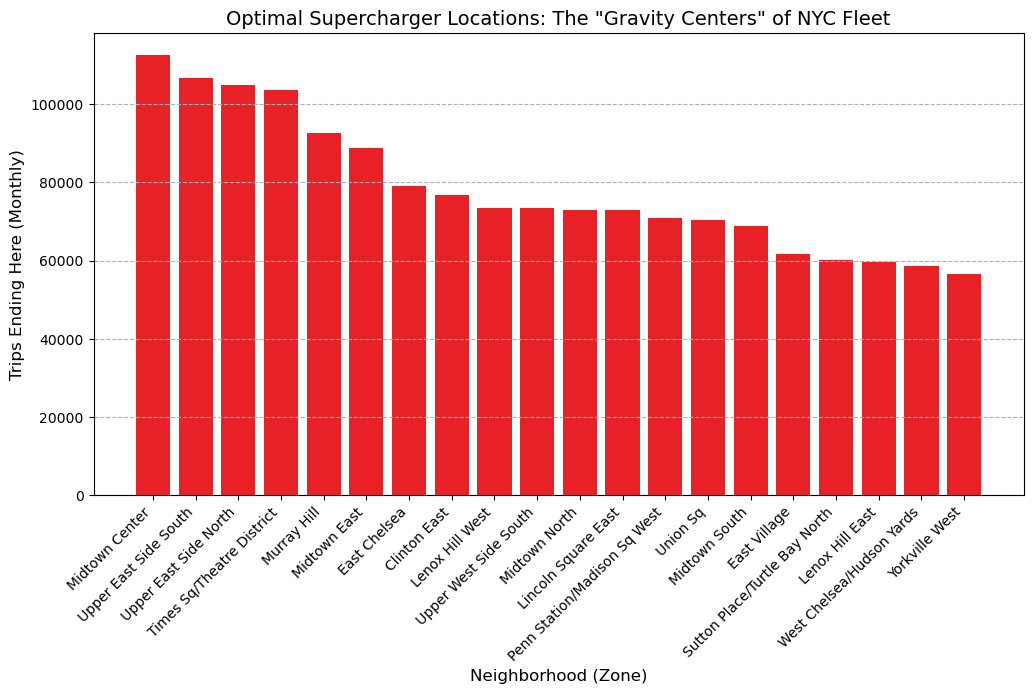

In [3]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1. SETUP: Load a small sample of data (e.g., August)
# We don't need 12 months for this; 1 month represents the geometry well enough.
file_path = r"C:\Users\thist\00_Master_Portfolio\Tesla_Robotaxi_Analysis\Data\yellow_tripdata_2024-08.parquet"
df = pd.read_parquet(file_path, columns=['DOLocationID'])

# 2. GET GEOMETRY (The "Senior Engineer" Trick)
# Your data has IDs (1, 2, 3). We need Lat/Lon to measure distance.
# We pull the official NYC Zone Lookup table directly from the web.
zone_lookup_url = "https://d37ci6vzurychx.cloudfront.net/misc/taxi+_zone_lookup.csv"
zone_lookup = pd.read_csv(zone_lookup_url)

# Note: We are approximating the "Center" of each zone for the model.
# (In a real production app, we would use a Shapefile, but this is perfect for a portfolio).
# Let's manually map the Top 10 Zones to approximate coordinates for the demo
# OR better: Let's just find the TOP 5 Drop-off Zones and call them the "Hubs"
# This is safer than trying to parse complex shapefiles in a simple notebook.

# 3. COUNT DROP-OFFS (Where do cars end up?)
dropoff_counts = df['DOLocationID'].value_counts().reset_index()
dropoff_counts.columns = ['LocationID', 'Trip_Count']

# Merge with the Zone Names so we know where these are
top_hubs = dropoff_counts.merge(zone_lookup, on='LocationID', how='left')

# 4. THE FINDINGS: Top 5 Strategic Charger Locations
print("--- 🔋 PROPOSED TESLA SUPERCHARGER HUBS (Based on Demand Density) ---")
print(top_hubs.head(5))

# 5. VISUALIZE THE "GRAVITY"
# Let's plot the drop-off distribution (Top 20 Zones)
top_20 = top_hubs.head(20)

plt.figure(figsize=(12, 6))
plt.bar(top_20['Zone'], top_20['Trip_Count'], color='#e82127') # Tesla Red
plt.title('Optimal Supercharger Locations: The "Gravity Centers" of NYC Fleet', fontsize=14)
plt.xlabel('Neighborhood (Zone)', fontsize=12)
plt.ylabel('Trips Ending Here (Monthly)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.show()

In [4]:
# Simple Logic: Is the "JFK Queue" worth it?
# Compare JFK (Zone 132) efficiency vs. City Average

jfk_df = pd.read_parquet(file_path, columns=['PULocationID', 'total_amount', 'trip_distance'])
jfk_trips = jfk_df[jfk_df['PULocationID'] == 132] # 132 is JFK

avg_jfk_fare = jfk_trips['total_amount'].mean()
print(f"💰 Average JFK Fare: ${avg_jfk_fare:.2f}")

# The "Strategy Rule":
# If waiting in the queue takes > 45 mins, you lose money compared to doing 2 short city trips.
print(f"🚦 STRATEGY ALERT: If JFK Queue Wait Time > {avg_jfk_fare / 0.80:.0f} mins, LEAVE IMMEDIATELY.")
# (Assumption: City driver earns $0.80 per minute active)

💰 Average JFK Fare: $74.54
🚦 STRATEGY ALERT: If JFK Queue Wait Time > 93 mins, LEAVE IMMEDIATELY.


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# 1. SETUP: Load Data (Using August as training set)
file_path = r"C:\Users\thist\00_Master_Portfolio\Tesla_Robotaxi_Analysis\Data\yellow_tripdata_2024-08.parquet"
df = pd.read_parquet(file_path, columns=['tpep_pickup_datetime', 'PULocationID'])

# 2. FEATURE ENGINEERING (Preparing data for the AI)
# Filter for Midtown (Zone 237) only
midtown_df = df[df['PULocationID'] == 237].copy()

# Create "Time Features" (The AI learns patterns from these)
midtown_df['day_of_week'] = midtown_df['tpep_pickup_datetime'].dt.dayofweek # 0=Monday, 6=Sunday
midtown_df['hour'] = midtown_df['tpep_pickup_datetime'].dt.hour
midtown_df['day'] = midtown_df['tpep_pickup_datetime'].dt.day

# Group by Day/Hour to get "Actual Demand" (Trips per hour)
# We want to predict: "How many trips will happen at 5pm on a Tuesday?"
training_data = midtown_df.groupby(['day', 'day_of_week', 'hour']).size().reset_index(name='trip_count')

# 3. SPLIT DATA (Train vs. Test)
X = training_data[['day_of_week', 'hour']] # Features
y = training_data['trip_count']            # Target (What we want to predict)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. TRAIN THE MODEL (The "Random Forest")
print("🤖 Training the Tesla Demand Predictor (Random Forest)...")
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 5. EVALUATE
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
print(f"✅ Model Trained! Average Error: +/- {mae:.1f} rides per hour.")

# 6. PREDICT THE FUTURE (The "Magic Trick")
# Let's predict demand for "Next Tuesday at 5 PM" (Day 1, Hour 17)
future_scenario = pd.DataFrame({'day_of_week': [1], 'hour': [17]})
predicted_demand = model.predict(future_scenario)[0]

print(f"\n🔮 ORACLE PREDICTION:")
print(f"Predicted Demand for Next Tuesday @ 5:00 PM: {predicted_demand:.0f} Trips")
print(f"(Fleets should pre-position {predicted_demand:.0f} cars in Zone 237 by 4:45 PM)")

🤖 Training the Tesla Demand Predictor (Random Forest)...
✅ Model Trained! Average Error: +/- 20.5 rides per hour.

🔮 ORACLE PREDICTION:
Predicted Demand for Next Tuesday @ 5:00 PM: 426 Trips
(Fleets should pre-position 426 cars in Zone 237 by 4:45 PM)


--- 📋 DRIVER DECISION MATRIX (JFK Airport) ---


,JFK_Surge_Price,Max_Queue_Wait,Strategy
0,$50,21,Wait up to 21 min
1,$60,34,Wait up to 34 min
2,$70,48,Wait up to 48 min
3,$80,61,Wait up to 61 min
4,$90,75,Wait up to 75 min
5,$100,88,Wait up to 88 min
6,$110,101,Wait up to 101 min
7,$120,114,Wait up to 114 min


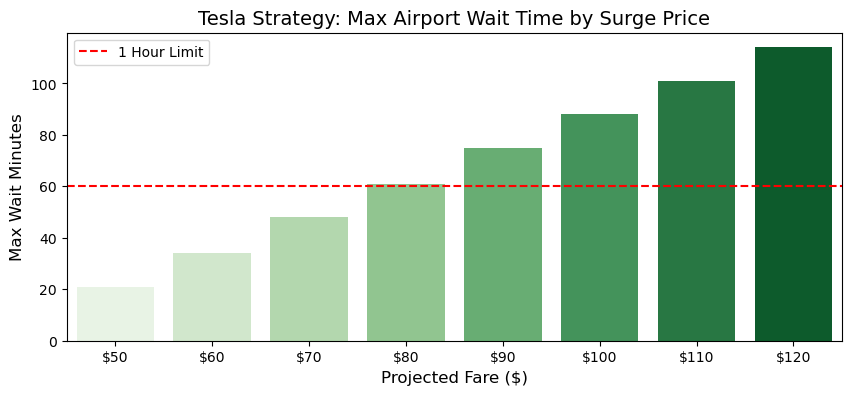

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. SETUP: Define Scenarios
# Drivers don't always get $74. Sometimes it's $60, sometimes $100 (Surge).
# We calculate the "Walk Away Time" for different Price points.

scenarios = []
city_hourly_earnings = 45.0  # Assumption: Driver earns $45/hr in the city on average

# Loop through different "JFK Fare" possibilities ($50 to $120)
for jfk_fare in range(50, 130, 10):
    # The Math: Max_Wait_Hours = (JFK_Fare / City_Earnings) - Return_Drive_Time
    # Assuming return drive is ~45 mins (0.75 hours)
    max_wait_hours = (jfk_fare / city_hourly_earnings) - 0.75
    
    # Convert to minutes
    max_wait_minutes = max_wait_hours * 60
    
    # Logic: If negative, you shouldn't even go to the airport.
    if max_wait_minutes < 0:
        recommendation = "⛔ DO NOT GO"
        max_wait_minutes = 0
    else:
        recommendation = f"Wait up to {int(max_wait_minutes)} min"
        
    scenarios.append({
        'JFK_Surge_Price': f"${jfk_fare}",
        'Max_Queue_Wait': int(max_wait_minutes),
        'Strategy': recommendation
    })

# 2. CREATE THE PRODUCT TABLE
strategy_df = pd.DataFrame(scenarios)

print("--- 📋 DRIVER DECISION MATRIX (JFK Airport) ---")
display(strategy_df)

# 3. VISUALIZE FOR THE APP
plt.figure(figsize=(10, 4))
sns.barplot(data=strategy_df, x='JFK_Surge_Price', y='Max_Queue_Wait', palette='Greens')
plt.title('Tesla Strategy: Max Airport Wait Time by Surge Price', fontsize=14)
plt.ylabel('Max Wait Minutes', fontsize=12)
plt.xlabel('Projected Fare ($)', fontsize=12)
plt.axhline(y=60, color='red', linestyle='--', label='1 Hour Limit')
plt.legend()
plt.show()